# Online Shoppers Purchasing Intention Dataset
## Description of Dataset
* The dataset used in our analysis was obtained from the UC Irvine Machine Learning Repository, a popular website with hundreds of datasets available for analysis.
* The dataset consists of feature vectors belonging to 12,330 sessions,it was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 
* Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.
* The dataset consists of 14 numerical and 4 categorical attributes.
* The 'Revenue' attribute can be used as the class label.
* The project is focused on applying Machine Learning classification models to e-commerce website data. Specifically, analyzing if machine learning is an effective method in predicting whether or not a visitor to an e-commerce website will make a purchase or not.


## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

E:\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Exploratory Data Analysis (EDA) 

In [2]:
# Reading data from csv file
data = pd.read_csv(r"E:\Semester_6\Data Computation\online+shoppers+purchasing+intention+dataset\online_shoppers_intention.csv")
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.columns #showing all cols in the dataset

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
data.shape #dim of dataset

(12330, 18)

In [6]:
data.size

221940

In [7]:
data.dtypes #data type of each column

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
data.isnull().sum()   #checking for null values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
data.duplicated().sum()  #checking for duplicate values

125

In [11]:
data.drop_duplicates(inplace=True)  #dropping duplicates 

In [12]:
data.reset_index(drop=True, inplace=True)  #reset index column after dropping all duplicates

In [13]:
data.duplicated().sum()  

0

In [14]:
data.dropna(inplace=True)  #removing any rows containing missing values

In [15]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [16]:
data['VisitorType'].value_counts() #counting the occurrences of each unique value in the 'VisitorType' column

VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: count, dtype: int64

In [17]:
data['Weekend'].value_counts() #count the occurrences of each unique value in the 'Weekend' column

Weekend
False    9346
True     2859
Name: count, dtype: int64

In [18]:
data['Revenue'].value_counts() #count the occurrences of each unique value in the 'Revenue' column

Revenue
False    10297
True      1908
Name: count, dtype: int64

In [19]:
data.describe() #generating descriptive statistics of the numerical columns

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [20]:
# Grouping dataset by "Revenue"
grouped = data.groupby('Revenue')
grouped.sum()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
Revenue,,,,,,,,,,,,,,,,,
False,22071,768519.43860,4709,315122.064399,299132,1.115141e+07,238.856194,468.776335,20593.848732,711.8,FebFebFebFebFebFebFebFebFebFebFebFebFebFebFebF...,21933,24096,32605,42049,Returning_VisitorReturning_VisitorReturning_Vi...,2360
True,6475,227974.02935,1500,109922.602050,91985,3.579808e+06,9.763527,37.311261,52020.700715,44.2,FebFebFebMarMarMarMarMarMarMarMarMarMarMarMarM...,3993,4681,5881,7673,Returning_VisitorReturning_VisitorReturning_Vi...,499


In [21]:
data['SpecialDay'].value_counts()

SpecialDay
0.0    10956
0.6      350
0.8      324
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64

In [22]:
data['Month'].value_counts()

Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64

In [23]:
data['TrafficType'].value_counts()

TrafficType
2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64

# Data Visualization

In [24]:
# Correlation Matrix between all numerical features 
data_num = data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Weekend','Revenue']].corr()
data_num

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,-0.006586,-0.025622,-0.007262,-0.034643,0.023825,0.136330
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,-0.007529,-0.015742,-0.006729,-0.014991,0.013259,0.091768
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,-0.009721,-0.038787,-0.030317,-0.035197,0.034359,0.093626
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,-0.009734,-0.019573,-0.027891,-0.025126,0.023193,0.069358
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.004194,-0.013586,-0.040108,-0.044223,0.013477,0.156042
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.002870,-0.007724,-0.034869,-0.037390,0.004903,0.150077
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,0.026811,-0.015501,0.002787,0.089184,-0.034808,-0.145091
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,0.016345,-0.003323,-0.000987,0.087478,-0.053061,-0.204320
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.018632,0.045908,0.010588,0.012286,0.010801,0.491894
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,0.012806,0.003528,-0.016450,0.052856,-0.017723,-0.083601


<Axes: >

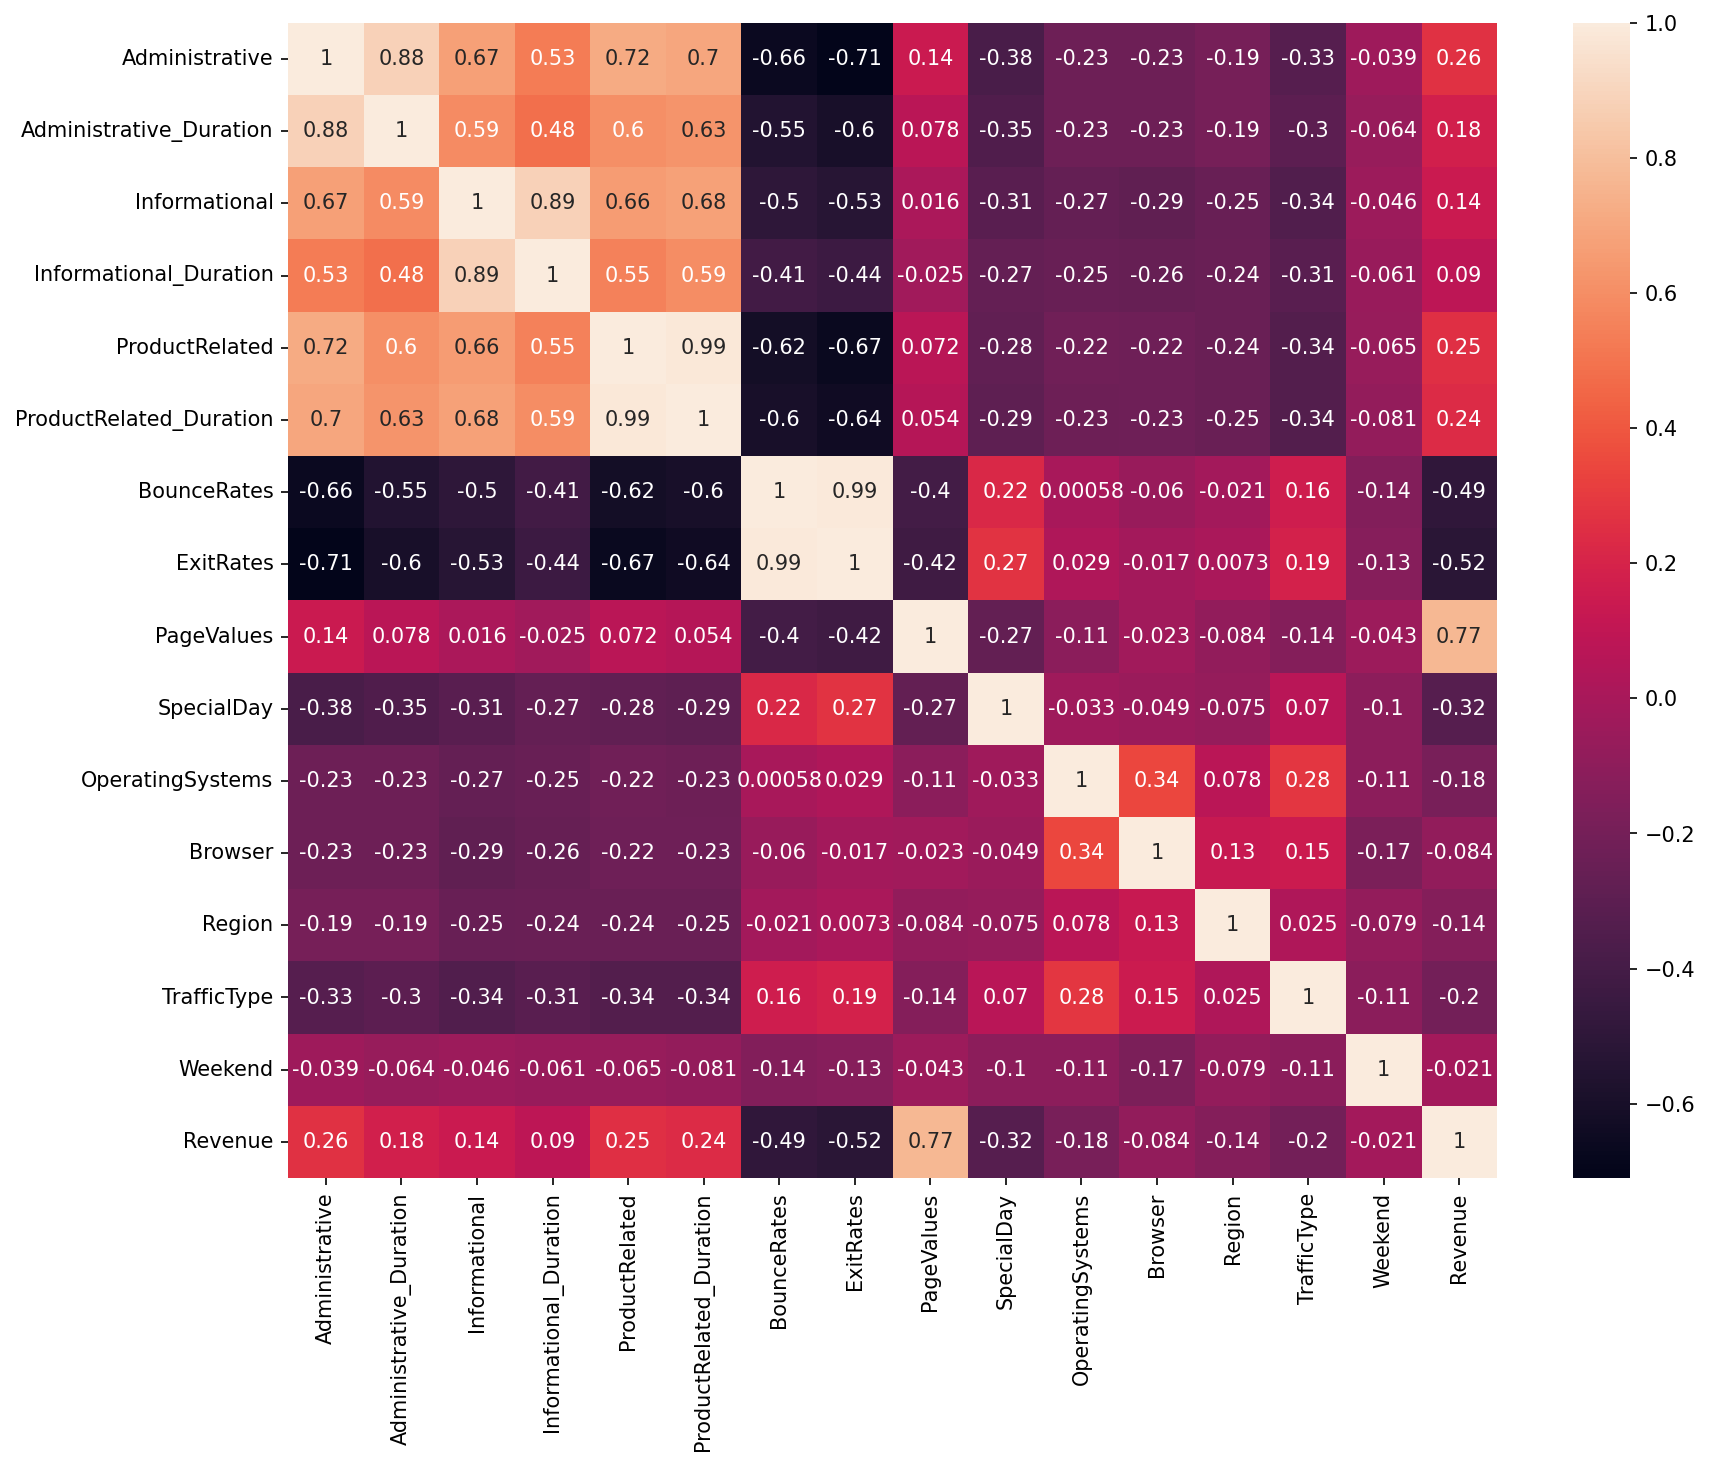

In [25]:
#Plotting a heatmap on the correlation values
plt.figure(figsize=(13,10), dpi=150)
sns.heatmap(data_num.corr(), annot=True)

In [26]:
#Finding the best correlation with the 'Revenue' column 
data_num.corr()['Revenue'].sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.769464
Administrative             0.259964
ProductRelated             0.253435
ProductRelated_Duration    0.235712
Administrative_Duration    0.178105
Informational              0.143903
Informational_Duration     0.089674
Weekend                   -0.020688
Browser                   -0.083657
Region                    -0.141502
OperatingSystems          -0.182346
TrafficType               -0.202529
SpecialDay                -0.324206
BounceRates               -0.490416
ExitRates                 -0.516421
Name: Revenue, dtype: float64

In [27]:
data_num.skew()

Administrative             1.062007
Administrative_Duration    1.587666
Informational              1.406483
Informational_Duration     1.851117
ProductRelated             1.212129
ProductRelated_Duration    1.217532
BounceRates                2.202698
ExitRates                  1.987842
PageValues                 2.678280
SpecialDay                 3.656284
OperatingSystems           3.551249
Browser                    3.577057
Region                     3.857393
TrafficType                3.580438
Weekend                    3.930671
Revenue                    2.331566
dtype: float64

## Uni-variate Analysis

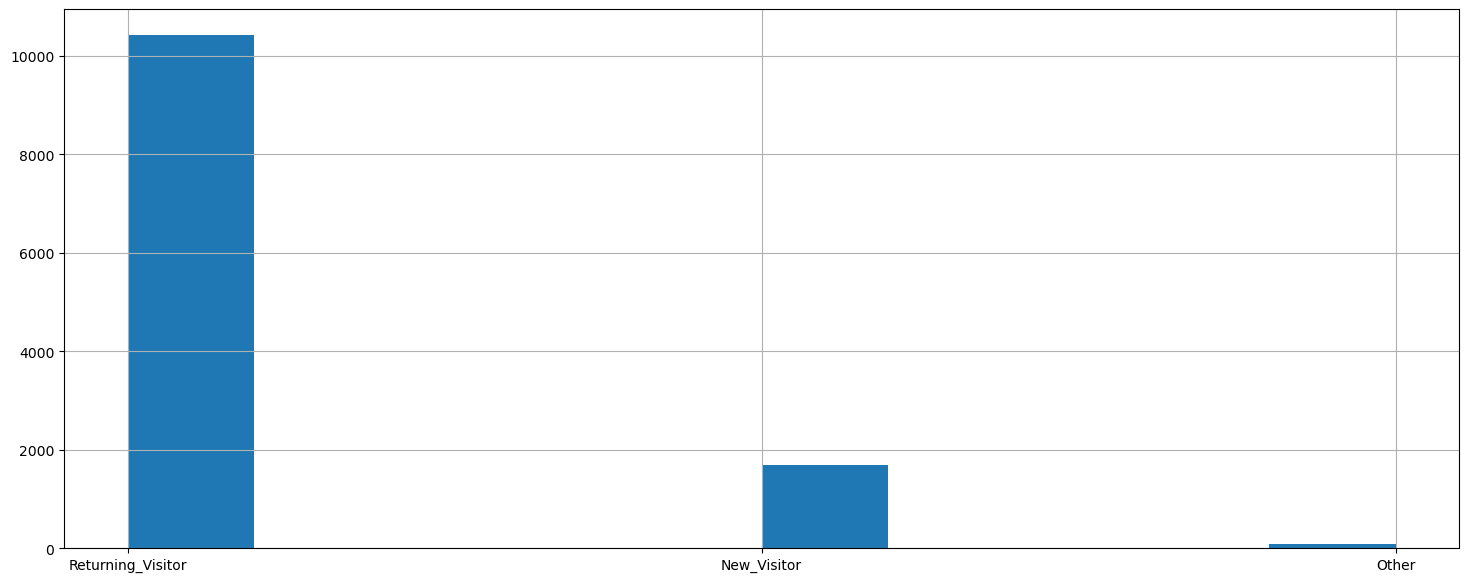

In [30]:
#Plotting a histogram on "VisitorType" Column
data.VisitorType.hist()
plt.show()

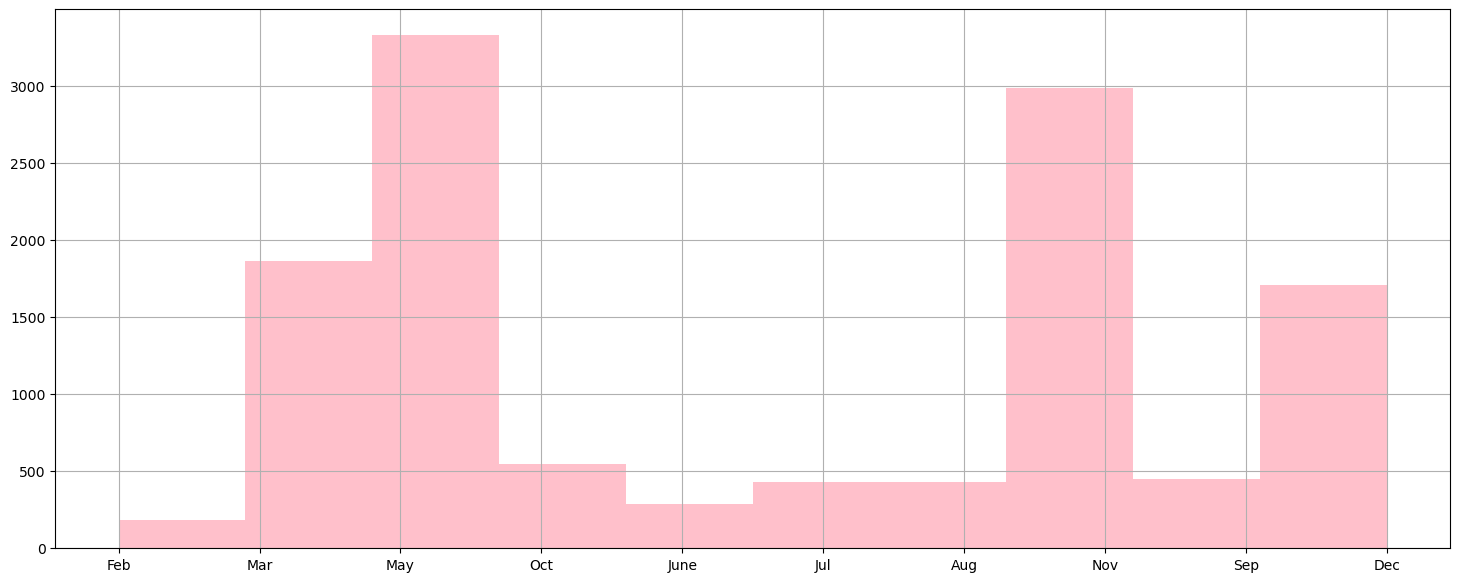

In [31]:
data.Month.hist(color='pink')
plt.show()

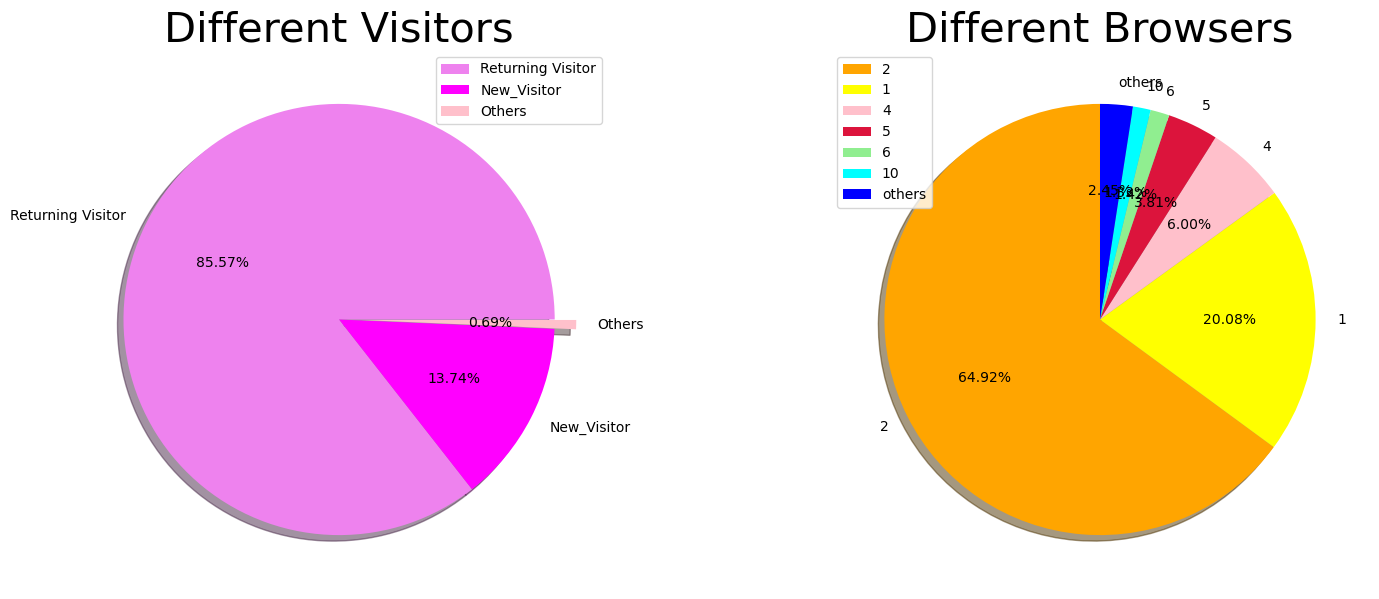

In [32]:
# plotting a pie chart for Visitors

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

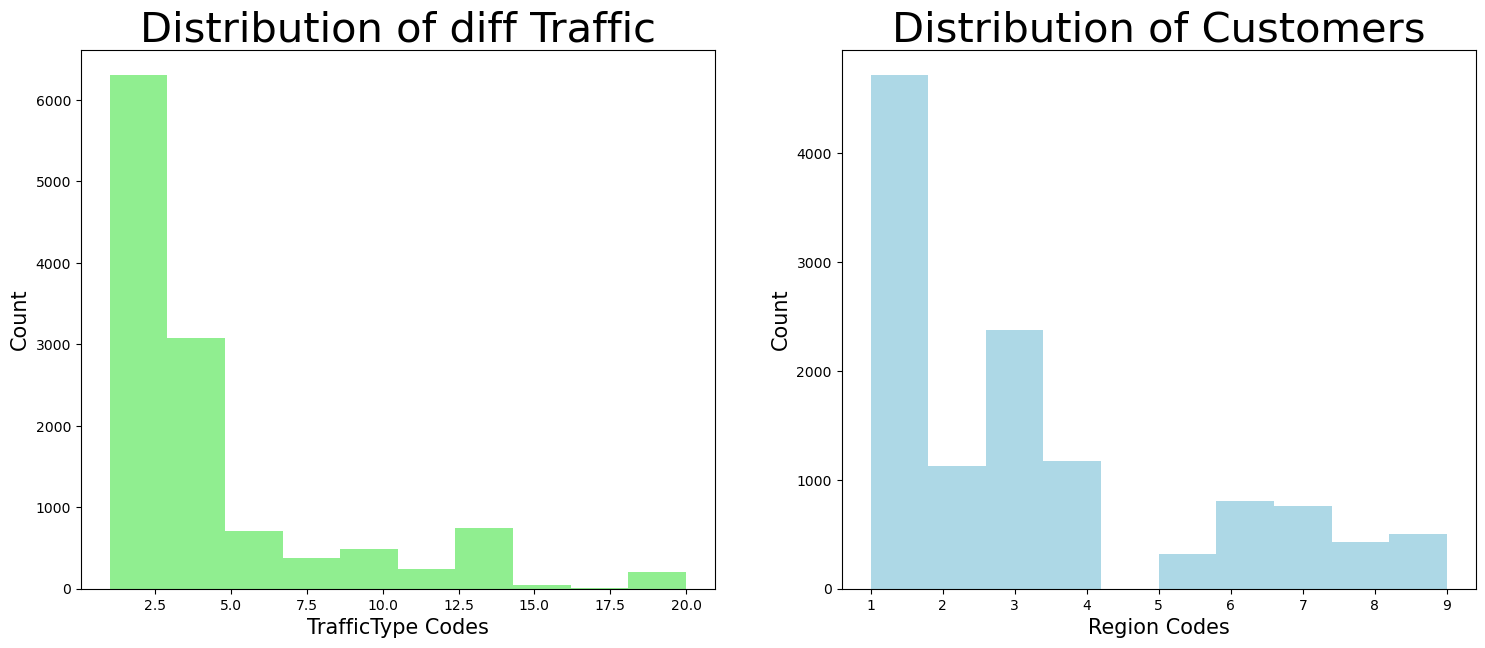

In [33]:
# visualizing the distribution of customers around the Traffic

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['TrafficType'], color = 'lightgreen')
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the distribution of customers around the Region

plt.subplot(1, 2, 2)
plt.hist(data['Region'], color = 'lightblue')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

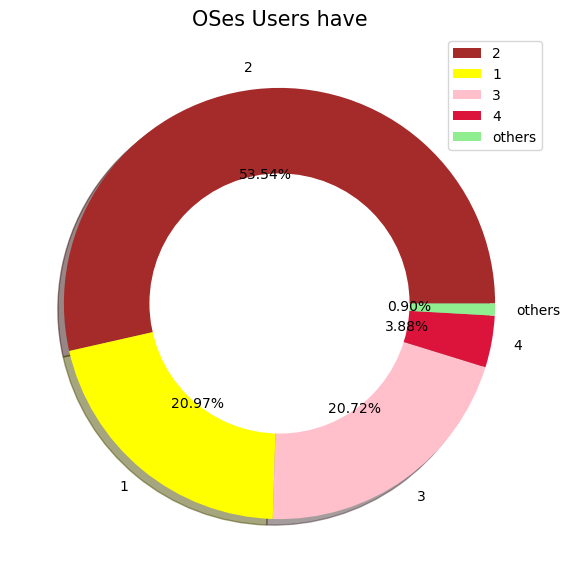

In [34]:
# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['brown', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 15)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

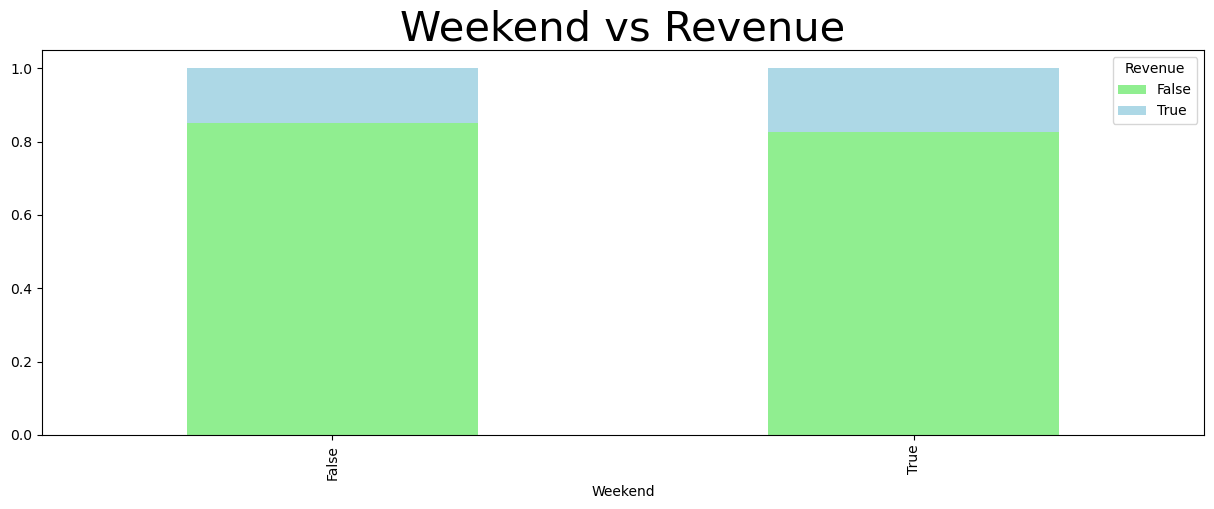

In [35]:
# weekend vs Revenue

df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'lightblue'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

C:\Users\Alpha\AppData\Local\Temp\ipykernel_17796\3799647310.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ExitRates'], color = 'red')
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


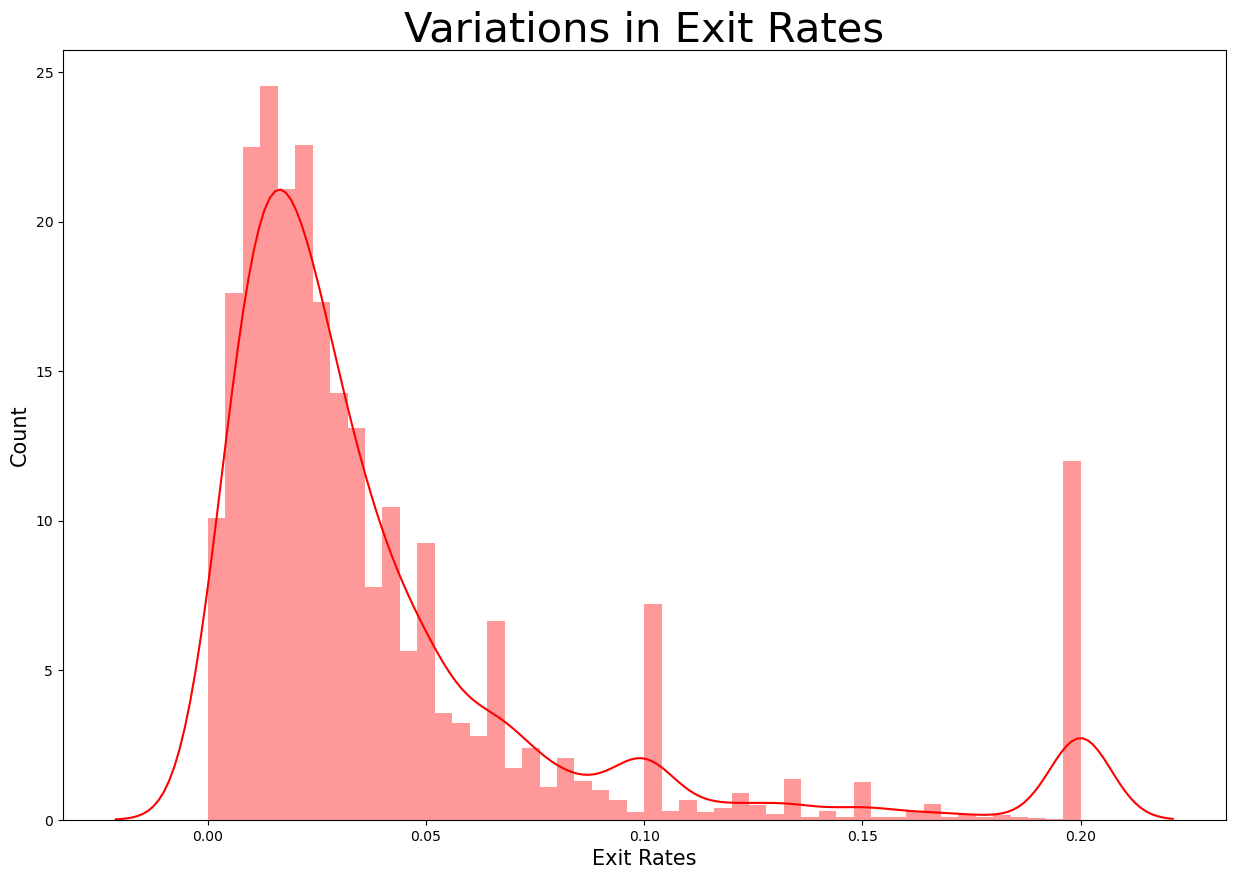

In [37]:
#variations in the "Exit Rates" 

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['ExitRates'], color = 'red')
plt.title('Variations in Exit Rates', fontsize = 30)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

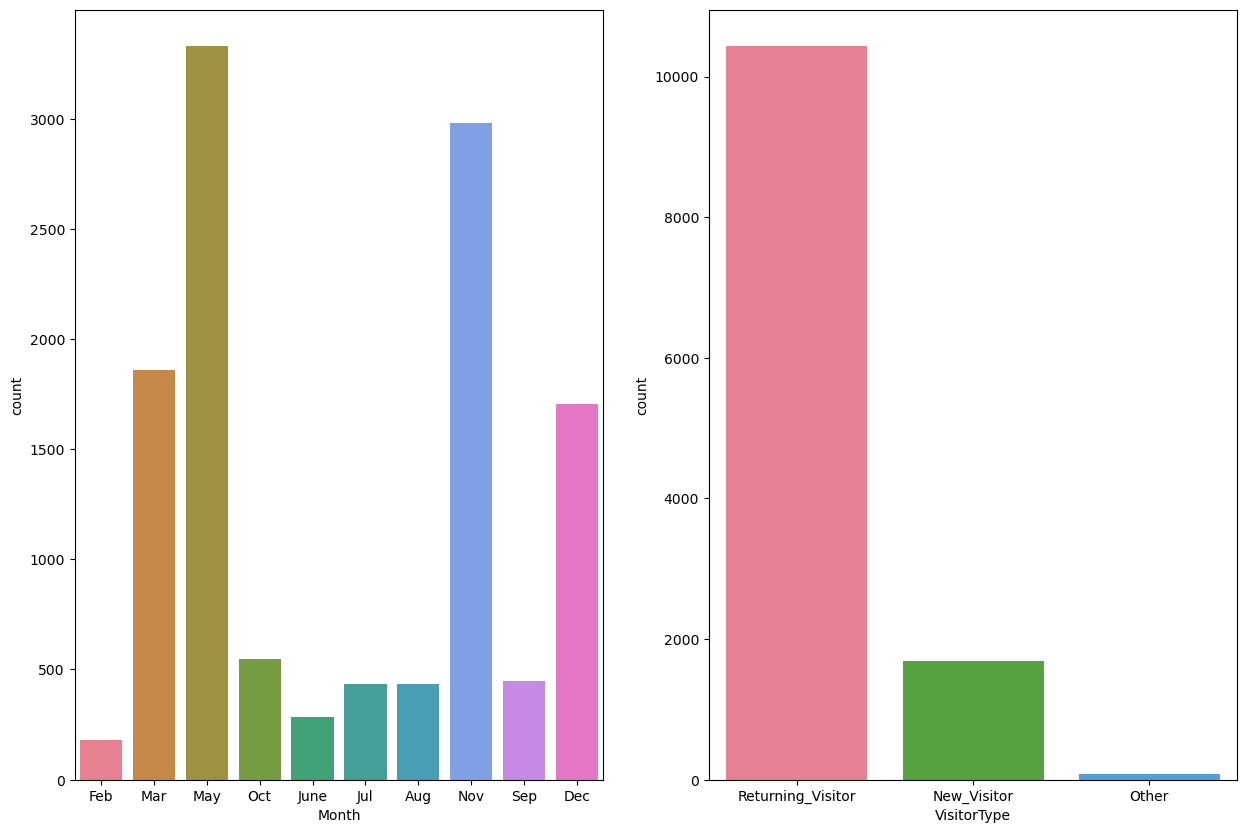

In [38]:
#Plotting the categorical variables "Month" and "VisitorType"
fig, axes = plt.subplots(1, 2, figsize=(15,10))

sns.countplot(x = data['Month'], data = data, palette='husl', ax=axes[0])
sns.countplot(x = data['VisitorType'], data = data, palette='husl', ax=axes[1])
plt.show()

C:\Users\Alpha\AppData\Local\Temp\ipykernel_17796\2421733745.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], color=np.random.choice(color_plot), ax=ax[i], shade=True)
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alpha\AppData\Local\Temp\ipykernel_17796\2421733745.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], color=np.random.choice(color_plot), ax=ax[i], shade=True)
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed i

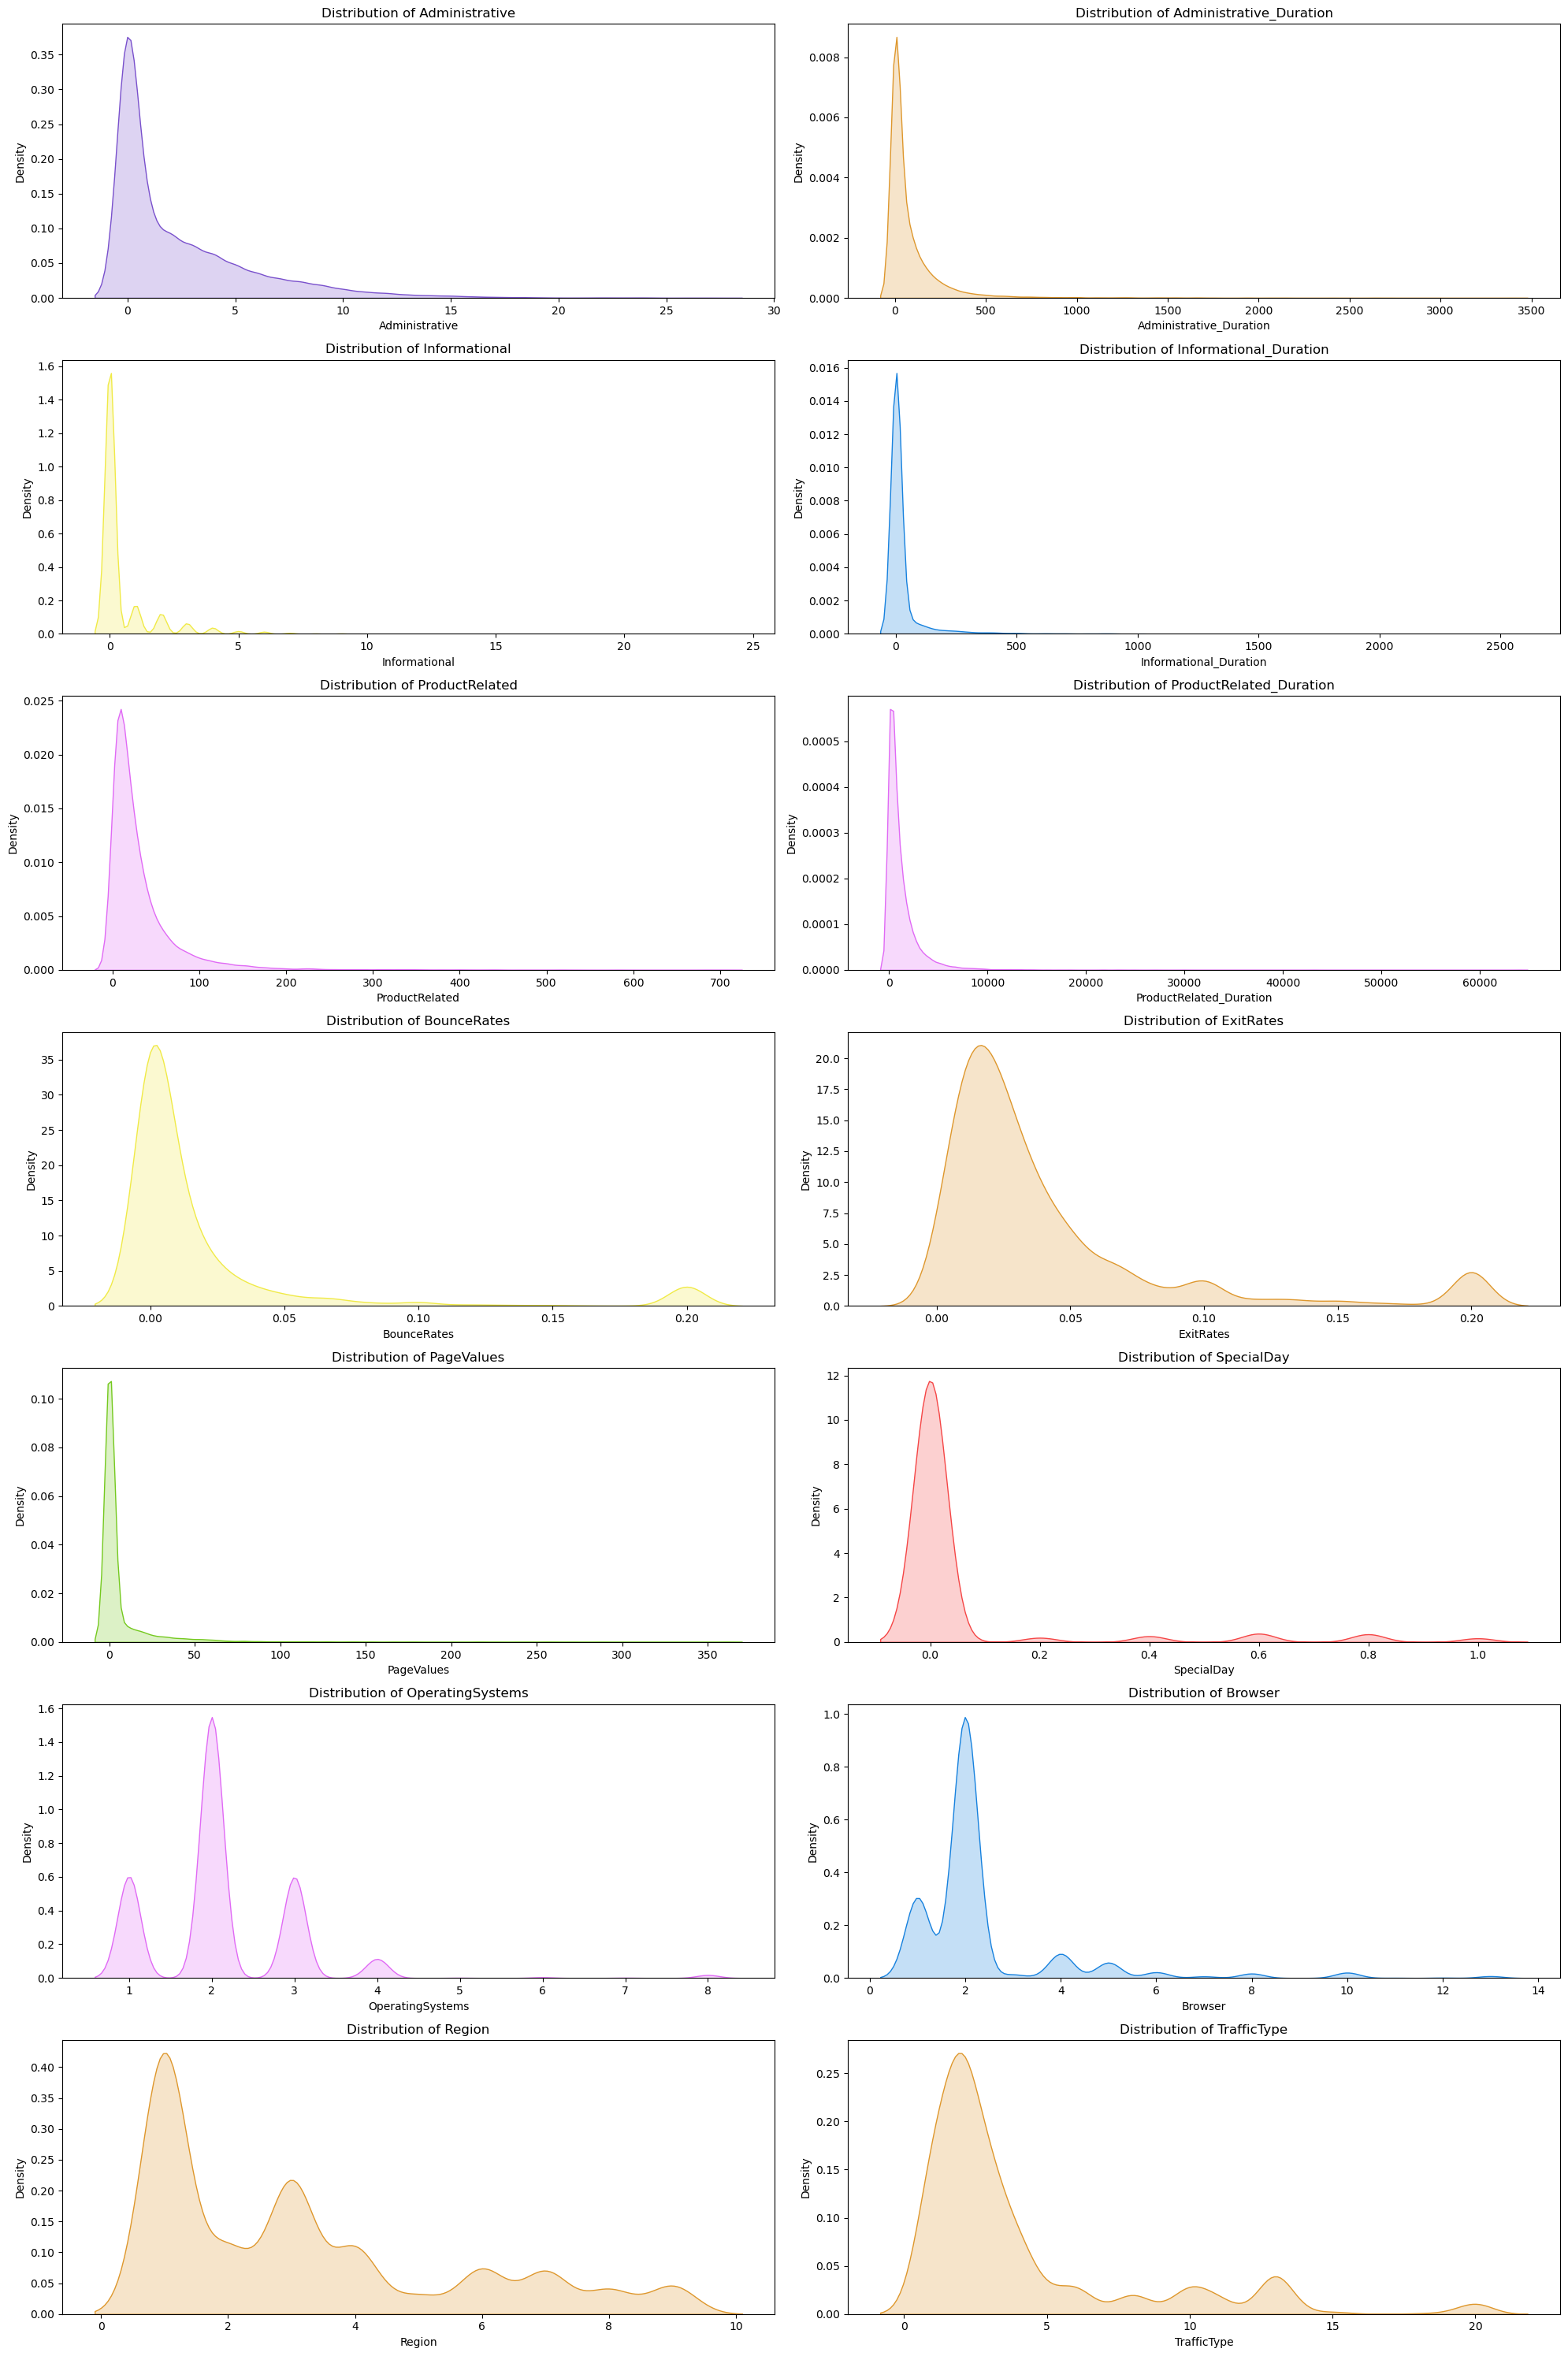

In [39]:
#KDA (Kernal Density Estimation)
color_plot = ['#de972c','#74c91e','#1681de','#e069f5','#f54545','#f0ea46','#7950cc']

# Create a figure and axes for subplots
fig, ax = plt.subplots(7, 2, figsize=(20, 30))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Iterate over the numerical columns in the dataset and plot KDE for each
for i, column in enumerate(data.select_dtypes(include=['int64', 'float64']).columns):
    sns.kdeplot(data[column], color=np.random.choice(color_plot), ax=ax[i], shade=True)
    ax[i].set_title(f'Distribution of {column}')
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Density')

# Remove any extra subplots
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

## Label Encoding
* Encoding "Revenue" Column (Target) where "false" will be set to "0" , "true" will be set to "1"
* Then Encoding the Categorical columns 

In [40]:
# label encoding of "Revenue"

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Revenue'] = label_encoder.fit_transform(data['Revenue'])  #transforms the categories into numerical labels
data['Revenue'].value_counts()

Revenue
0    10297
1     1908
Name: count, dtype: int64

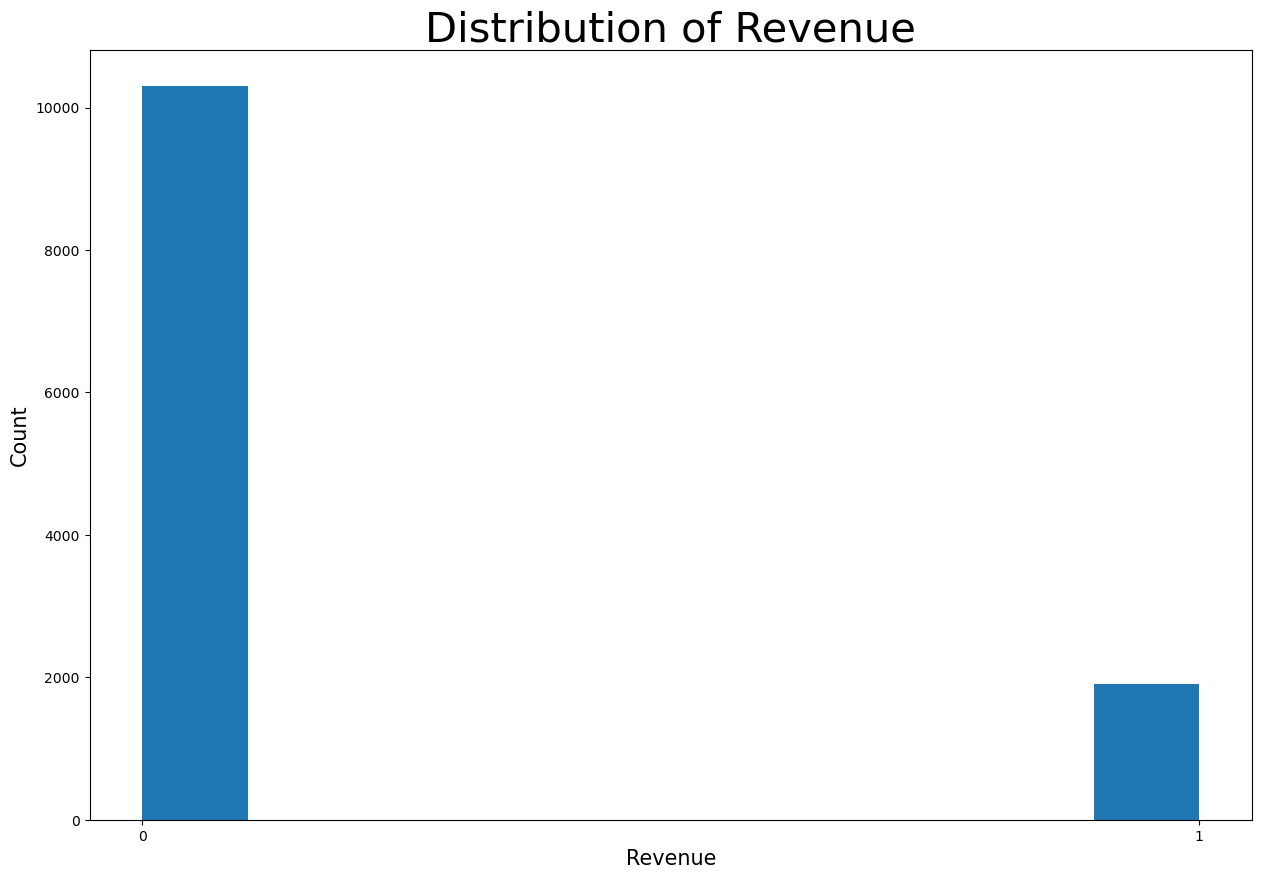

In [52]:
#plotting histogram for "Revenue" ==> Target column
plt.hist(data['Revenue'])
plt.title('Distribution of Revenue',fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks([0, 1])

plt.show()

In [53]:
# label encoding of "Month" , "VisitorType" and "Weekend" columns
label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])
data['VisitorType'] = label_encoder.fit_transform(data['VisitorType'])
data['Weekend'] = label_encoder.fit_transform(data['Weekend'])

In [55]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


## Box plot
* For detecting the Outliers

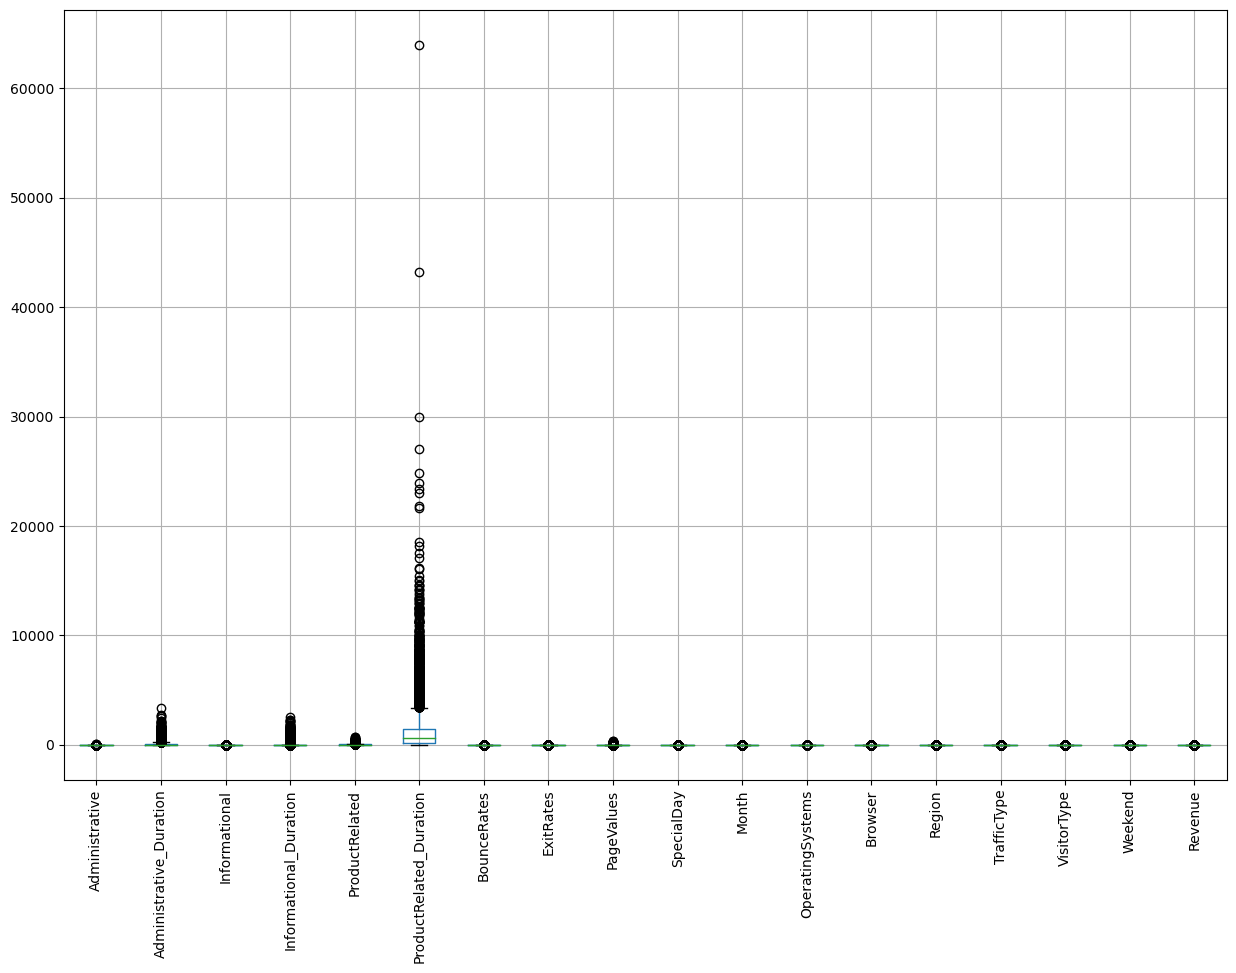

In [56]:
data.boxplot()
plt.xticks(rotation='vertical')
plt.show()

In [57]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,5.168046,2.124211,2.357804,3.153298,4.073904,1.715936,0.234248,0.156329
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,2.374071,0.906823,1.710114,2.402340,4.016654,0.693425,0.423545,0.363182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


## T-sne Plot (t-distributed stochastic neighbor embedding)
* Dimensionality reduction technique commonly used for visualizing high-dimensional data in lower-dimensional space, typically 2D or 3D. 
* Providing valuable insights into the underlying structure and relationships within the data.

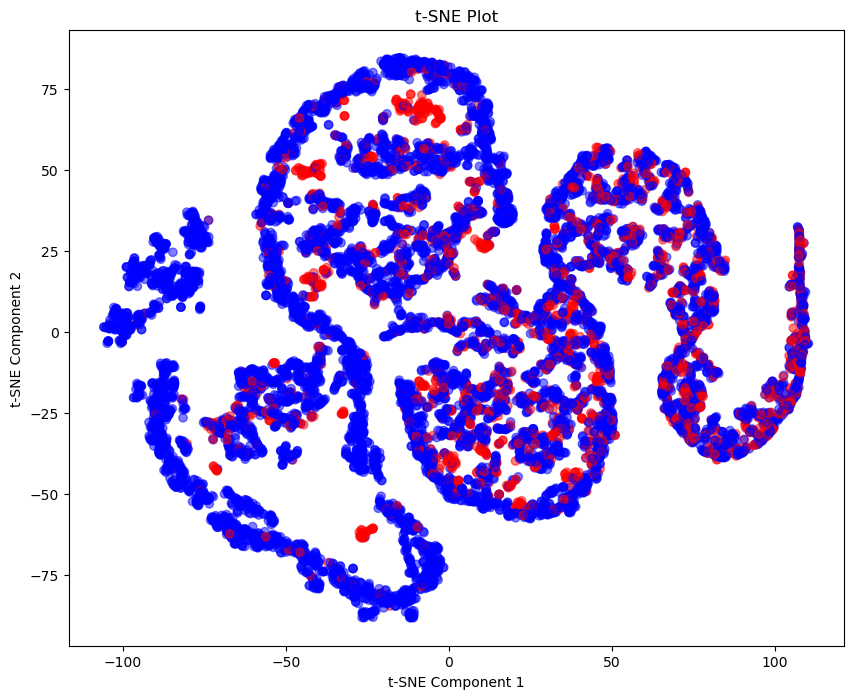

In [58]:

# colors for different classes or categories
colors = ['red' if label else 'blue' for label in data['Revenue']] 

# Apply t-SNE to reduce the dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data.drop(columns=['Revenue'], axis=1))

# scatter plot of the t-SNE result
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=colors, alpha=0.5)
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## Feature Engineering
* Process of creating new features or transforming existing ones to improve the performance of machine learning models.

In [59]:
# Generate the new feature "TotalPageView" by summing the pages views from the three columns
data['TotalPageView'] = data[['Administrative', 'Informational', 'ProductRelated']].sum(axis=1)
# Generate the new feature "TotalPageDuration" by summing the pages durations from the three columns
data['TotalPageDuration'] = data[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].sum(axis=1)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,TotalPageView,TotalPageDuration
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0,1,0.000000
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0,2,64.000000
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0,1,0.000000
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0,2,2.666667
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0,10,627.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0,56,1928.791667
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0,5,465.750000
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0,6,184.250000
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0,19,421.000000


In [60]:
#dropping the old columns
data.drop(['Administrative', 'Informational', 'ProductRelated','Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'],axis=1, inplace=True)

<Axes: >

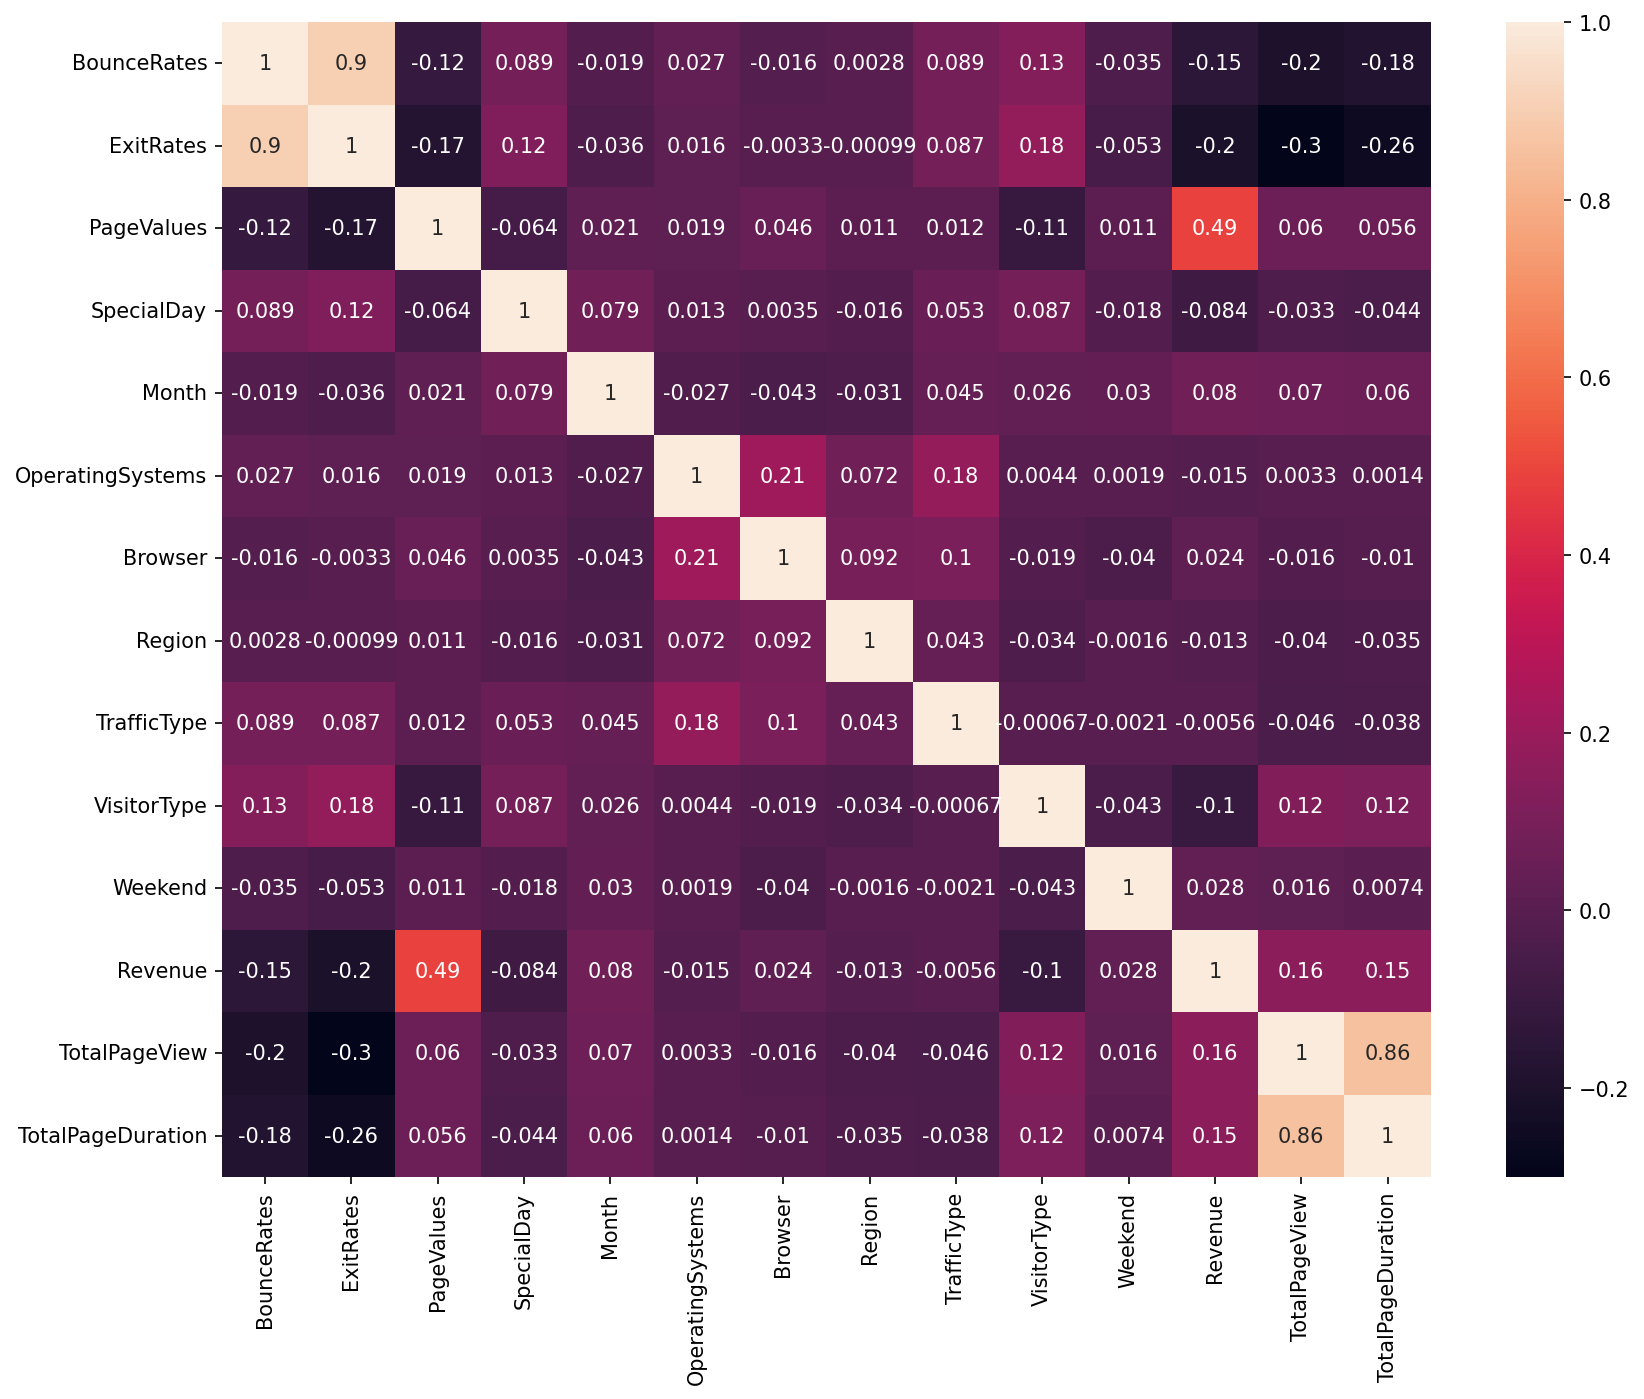

In [61]:
#Plotting a heatmap again on the correlation values after applying feature engineering
plt.figure(figsize=(13,10), dpi=150)
sns.heatmap(data.corr(), annot=True)

## PCA (Principal Component Analysis)
* Dimensionality reduction technique widely used in machine learning and data analysis to reduce the number of features (or dimensions) in a dataset while preserving most of the important information.


In [62]:
X=data.drop(columns=['Revenue'],axis=1)
y=data['Revenue']

### Standardization (Z-score Normalization)
* Ensuring that the features are on a similar scale.

In [63]:
scaler = StandardScaler() # instance from StandardScaler 
scaler.fit(X)  #fitting the scaler to the data

StandardScaler()

In [64]:
scaled_data = scaler.transform(X)  #transforming data
scaled_data

array([[ 3.96940208,  3.4343938 , -0.31896229, ..., -0.55308794,
        -0.72692613, -0.64754971],
       [-0.45013707,  1.26805406, -0.31896229, ..., -0.55308794,
        -0.7054786 , -0.61623531],
       [ 3.96940208,  3.4343938 , -0.31896229, ..., -0.55308794,
        -0.72692613, -0.64754971],
       ...,
       [ 1.39133757,  0.97920877, -0.31896229, ...,  1.80803074,
        -0.6196885 , -0.55739848],
       [-0.45013707, -0.44221415, -0.31896229, ..., -0.55308794,
        -0.34087068, -0.44155965],
       [-0.45013707,  0.54594082, -0.31896229, ...,  1.80803074,
        -0.68403108, -0.63715235]])

In [65]:
pca = PCA() # an instance of PCA

In [66]:
pca.fit(scaled_data)  #fitting scaled data

PCA()

In [67]:
x_pca = pca.transform(scaled_data)  # transforms the standardized data into the principal component space.

In [68]:
x_pca

array([[-4.41288271,  2.1983184 , -1.81519737, ..., -0.18417169,
        -0.13654877, -0.32526975],
       [-1.11323892, -0.20135406, -0.79022176, ...,  0.06642618,
         0.29058677,  1.08677164],
       [-4.65166829,  1.86202731,  1.3672019 , ...,  2.20220605,
        -0.12138847, -0.28079468],
       ...,
       [-1.87651106,  0.65155315,  0.97139462, ..., -0.2326477 ,
        -0.03484844, -0.28225917],
       [-0.07429416, -0.29224457,  0.44878672, ..., -0.62975112,
        -0.06965382, -0.05127475],
       [-0.3791545 , -1.63847538, -0.2826897 , ...,  1.01882154,
         0.19995127,  0.76519517]])

In [69]:
scaled_data.shape

(12205, 13)

In [70]:
x_pca.shape

(12205, 13)

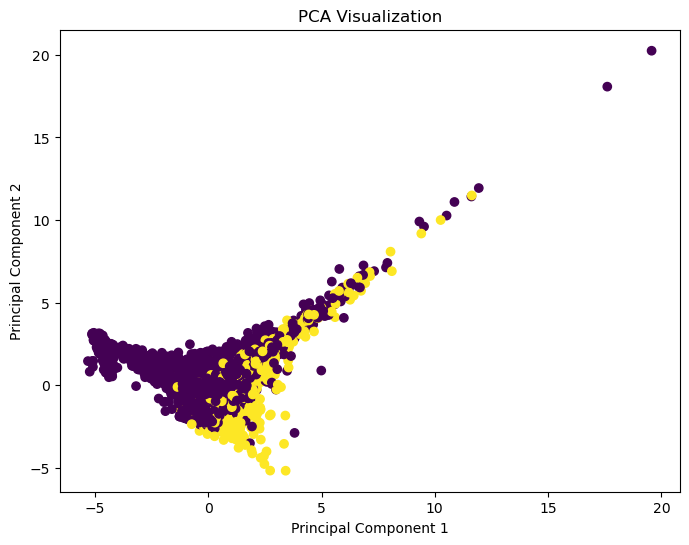

In [71]:
#Plotting the data on the new axes the PCA formed
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=data['Revenue'])
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Scree Plot
* Is a graphical tool used in Principal Component Analysis (PCA) to visualize the proportion of variance explained by each principal component.
* help deciding how many principal components to retain for further analysis or dimensionality reduction based on the amount of variance explained.

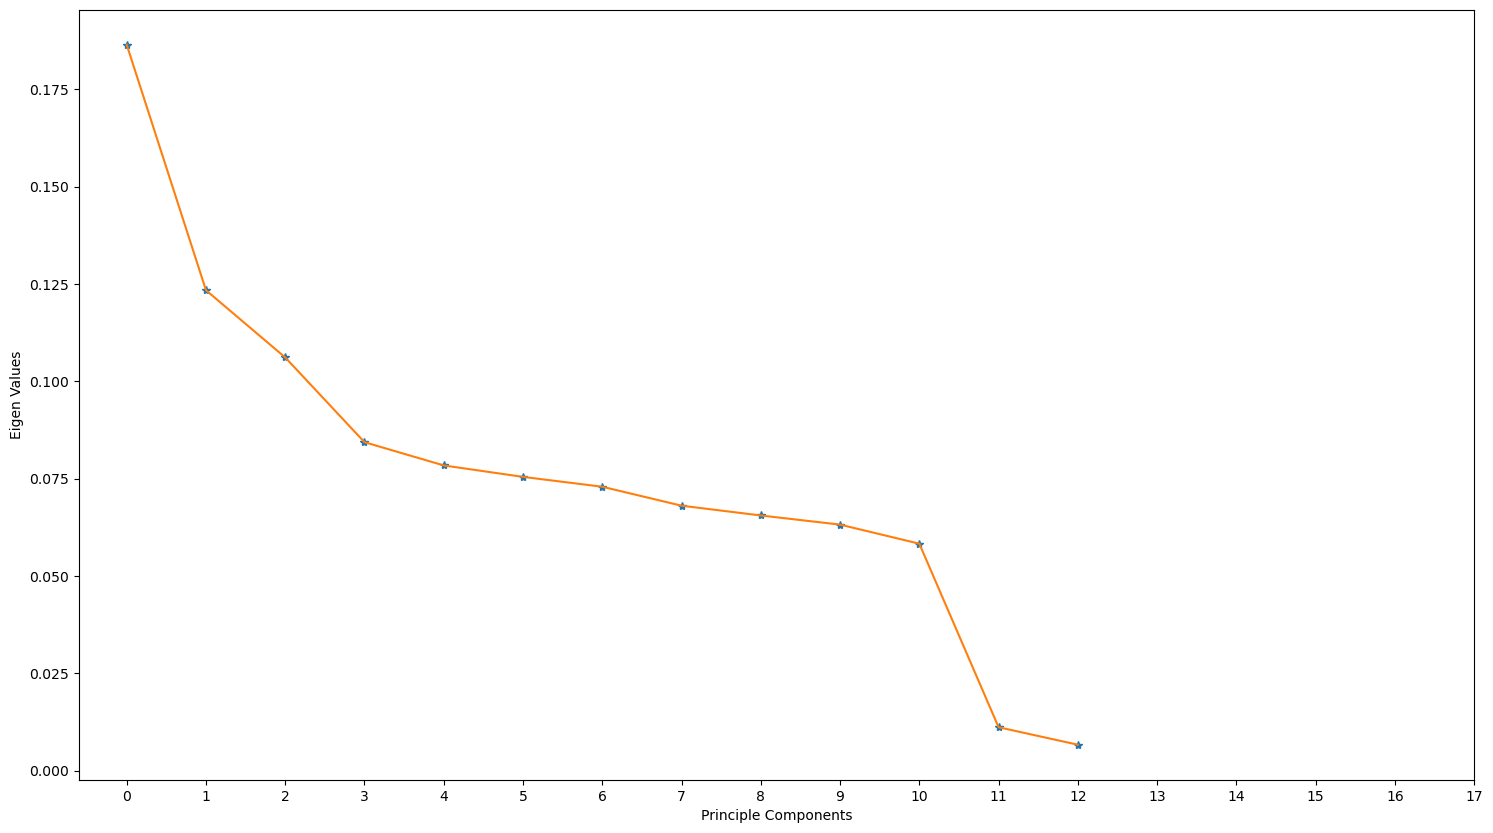

In [72]:
plt.figure(figsize=(18 , 10))

plt.plot(pca.explained_variance_ratio_,'*')
plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(0,18,1))
plt.xlabel('Principle Components')
plt.ylabel('Eigen Values')
plt.show()

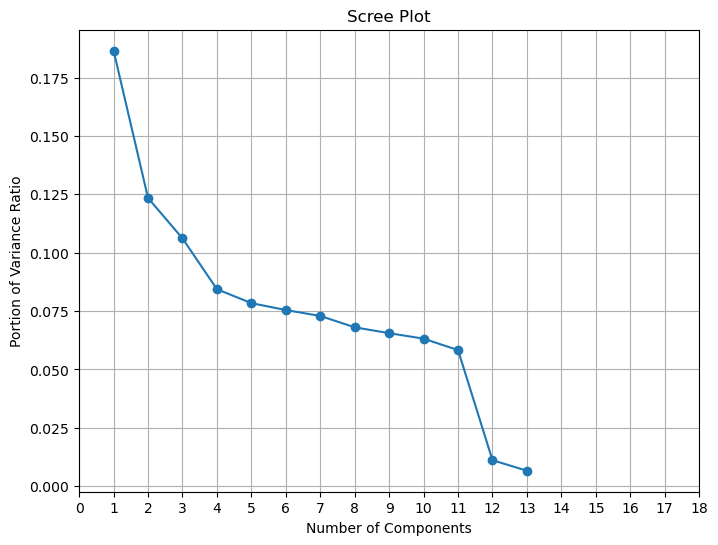

In [73]:
#plotting scree plot between no.of principal components and POV (portion of variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xticks(range(0,19,1))
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Portion of Variance Ratio')
plt.grid(True)
plt.show()

### From the previous Scree Plot , the portion of variance (POV) seems to be approximately the same after the fifth component so , n_components = 4 will be selected to reduce standardized data to these axes

In [74]:
pca = PCA(n_components=4)

In [75]:
x_pca = pca.fit_transform(scaled_data)
x_pca

array([[-4.41288271,  2.1983184 , -1.81519737,  1.94090162],
       [-1.11323892, -0.20135406, -0.79022176,  1.15902072],
       [-4.65166829,  1.86202731,  1.3672019 ,  2.34086337],
       ...,
       [-1.87651106,  0.65155315,  0.97139462, -1.56409045],
       [-0.07429416, -0.29224457,  0.44878672, -0.96054587],
       [-0.3791545 , -1.63847538, -0.2826897 , -1.03958144]])

In [76]:
x_pca.shape

(12205, 4)

## Support Vector Machine 
* powerful supervised learning algorithm used for classification and regression tasks.
* Types:
1. Soft SVM
2. Hard SVM
3. Kernal SVM

In [77]:
# Split the data into training and testing sets ==> 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=42)

# Training Linear SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

#predictions on Test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8509011469142546


In [84]:
# Training Polynomial SVM model
svm_model = SVC(kernel='poly', random_state=42)
svm_model.fit(X_train, y_train)

#predictions on Test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8585472419442928


In [85]:
# Training RBF (Radial Based Function) SVM model
svm_model = SVC(kernel='rbf', C=1, gamma=1)
svm_model.fit(X_train, y_train)

#predictions on Test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8672856362643364


In [83]:
# Classification Report on RBF SVM Trained Model
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      3116
           1       0.76      0.16      0.26       546

    accuracy                           0.87      3662
   macro avg       0.82      0.58      0.60      3662
weighted avg       0.85      0.87      0.83      3662



## Accuracies using different functions in SVM
* Linear ===> 85%
* Polynomial ===> 85.8%
* RBF (Radial Based Function) ===> approximately 87%
* So the best one obtained is from RBF (87%)

## Confusion Matrix

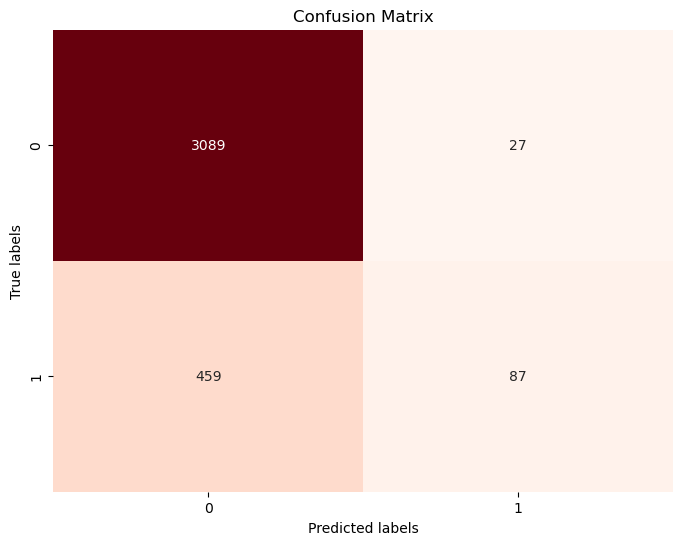

In [86]:
#confusion matrix using heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## ROC (Receiver Operating Characteristic) Curve
* graphical tool used to evaluate the performance of a binary classification model across different threshold values.

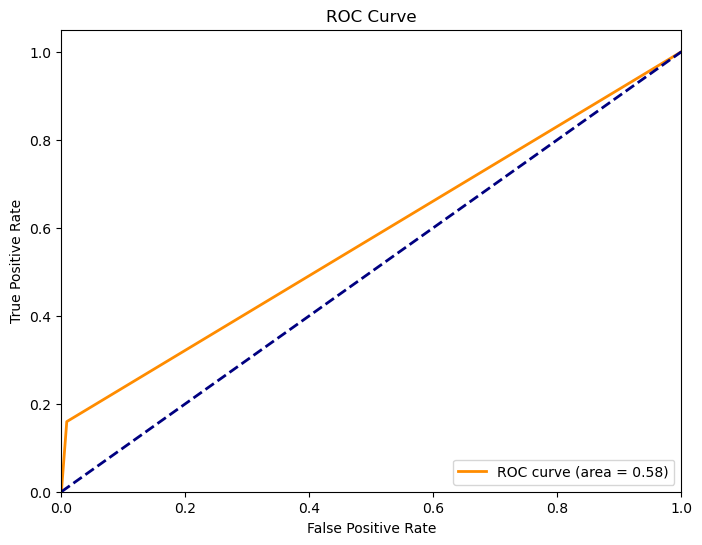

In [87]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tunning 
* Essential step in optimizing the performance of Support Vector Machine (SVM) models.
* Hyperparameters ==> C and Gamma

In [91]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.846 total time=   5.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.844 total time=   4.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.843 total time=   4.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.843 total time=   4.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.845 total time=   4.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.842 total time=   3.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   3.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.841 total time=   3.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.843 total time=   3.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.843 total time=   3.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.841 total time=   3.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [92]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [93]:
grid_predictions = grid.predict(X_test) 
  
# classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      3116
           1       0.76      0.16      0.26       546

    accuracy                           0.87      3662
   macro avg       0.82      0.58      0.60      3662
weighted avg       0.85      0.87      0.83      3662



## Balancing the Dataset (Undersampling)
* Balancing the dataset is crucial, especially when dealing with imbalanced datasets where one class is significantly more prevalent than the others.

* Random Undersampling: Randomly remove instances from the majority class to balance the class distribution.
* 85% of the sessions contain a False class label, with the remaining 15% containing a True label.
1. class "0" ==> 10297
2. class "1" ==> 1908

In [94]:
data['Revenue'].value_counts()

Revenue
0    10297
1     1908
Name: count, dtype: int64

In [95]:
no_revenue = data.query('Revenue == 0')
revenue = data.query('Revenue == 1')
no_revenue['Revenue'].value_counts(), revenue['Revenue'].value_counts()

(Revenue
 0    10297
 Name: count, dtype: int64,
 Revenue
 1    1908
 Name: count, dtype: int64)

In [96]:
#taking a sample from the class labeled "0" == the size of remaining class labeled "1" to balance the data then concatenating both
balanced_data = pd.concat([revenue, no_revenue.sample(len(revenue), random_state=1)])
balanced_data['Revenue'].value_counts()

Revenue
1    1908
0    1908
Name: count, dtype: int64

In [97]:
balanced_data = balanced_data.sample(frac=1, random_state=1)
balanced_data

,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,TotalPageView,TotalPageDuration
987,0.000000,0.066667,0.000000,0.0,5,2,4,3,1,2,1,0,3,15.000000
11723,0.000000,0.100000,0.000000,0.0,1,1,1,3,2,2,1,0,2,13.000000
9689,0.000000,0.022222,0.000000,0.0,7,2,2,1,8,0,1,1,7,192.062500
292,0.000000,0.014286,59.790143,0.0,5,3,2,1,3,2,0,1,13,328.916667
11074,0.000000,0.002083,93.777617,0.0,1,1,1,1,2,0,1,1,16,865.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,0.028571,0.085714,0.000000,0.6,6,2,2,3,3,2,0,0,7,1689.000000
7324,0.000000,0.002083,62.773672,0.0,9,1,1,1,3,0,1,1,31,790.659524
8250,0.012245,0.029388,0.000000,0.0,7,2,2,4,10,2,0,1,47,1557.483333
2368,0.010526,0.049123,22.329347,0.0,6,2,2,1,3,2,1,1,24,649.500000


In [98]:
x_b=balanced_data.drop(columns=['Revenue'],axis=1)
y_b=balanced_data['Revenue']

## After Balancing Dataset 
* PCA
* SVM

In [99]:
# Split the data into training and testing sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(x_b, y_b, test_size=0.3, random_state=42)

# Initialize PCA
pca = PCA(n_components=4)  # Specify the number of components

# Fit PCA to the training data
X_train_pca = pca.fit_transform(X_train_b)

# Transform the testing data using the fitted PCA model
X_test_pca = pca.transform(X_test_b)

# Training Linear SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_pca, y_train_b)

# predictions on the testing data
y_pred_b = svm_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test_b, y_pred_b)
print("Accuracy:", accuracy)

Accuracy: 0.8122270742358079


## Confusion Matrix

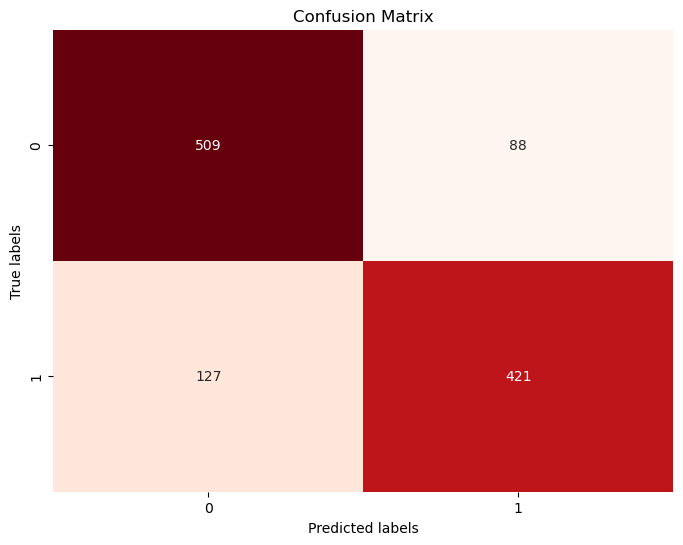

In [100]:
#confusion matrix using heatmap
cm = confusion_matrix(y_test_b, y_pred_b)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## ROC Curve

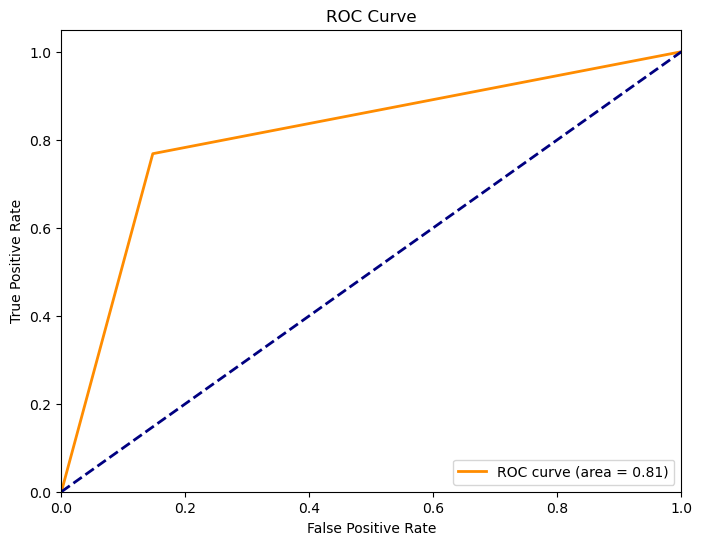

In [101]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_b, y_pred_b)

# Calculate the Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tunning for SVM

In [102]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.846 total time=   5.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.844 total time=   5.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.843 total time=   4.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.843 total time=   5.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.845 total time=   4.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.842 total time=   3.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   3.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.841 total time=   3.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.843 total time=   3.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.843 total time=   3.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.841 total time=   3.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [103]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
